# Linear Regressions

Many relationships can be described as linear. That is as an independent variable varies, the dependent variable will vary in a constant proportional amount. Example include housing prices as a function of the number of rooms, or increased supply resulting in price reductions. Let's depict a linear relation graphically. 

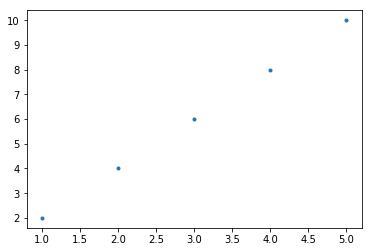

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, '.')
plt.show()

It is clear that the relationship here results in a straight line. This is the ideal situation. Mathematially a linear relation follows the formula: 

\begin{align}
\ y = c + \beta x \\
\ y = c + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 ...\beta_n x_n
\end{align}

Where the top one is a relationship involving a single IV and the other involves multiple IV. 
'y' is the output, which frequently for us will be our prediction, 
'c' is the intercept of the y-axis, 
beta is the coefficient; (also known as slope), 
'x' is our IV. We can rebuild our examaple above by incorporating the formula as such:

\begin{align}
\ y = 0 +  2x \\
\end{align}

However, most real world examples won't be this kind to us. Let's dive into nosier data. The code below generate random data, that shows a linear relationship with variation. 

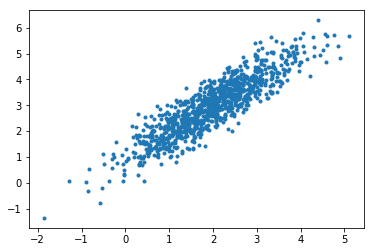

In [2]:
np.random.seed(21)
x_noisy = np.random.normal(2, 1, 1000)
y_noisy = x_noisy + np.random.normal(1,.5,len(x_noisy))
plt.plot(x_noisy, y_noisy, '.')
plt.show()

The challange here is which line describes this relationship best?

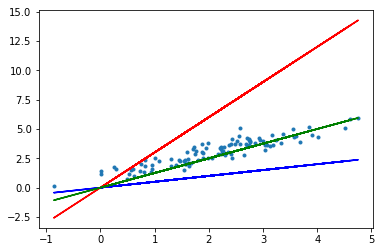

In [3]:
np.random.seed(21)
x_noisy = np.random.normal(2, 1, 100)
y_noisy = x_noisy + np.random.normal(1,.5,len(x_noisy))
plt.plot(x_noisy, y_noisy, '.')
plt.plot(x_noisy, x_noisy*3, 'r-')
plt.plot(x_noisy, x_noisy*.5, 'b-')
plt.plot(x_noisy, x_noisy*1.25, 'g-')
plt.show()

We drew three random regression lines but the issues are obvious. The red line significantly overshoots the data while the blue undershoot the data. The green seems resonable, but how can we quantify this certainty? 

If the regressions are representations of our predictions, then we can measure accuracy by measuring how far off the predicted values are from the actual values. The greater the difference the more inaccurate our model is. This difference is formally caled the residual, it is a measure of error. Let's compare the lines using this reasoning. We'll begin by squeezing out the values of our regressions.

In [4]:
red_prediction = x_noisy*3
blue_prediction = x_noisy*.5
green_prediction = x_noisy*1.25

#These variable contain the same values used to generate our lines. 
#Now we need to compare the differences of each predicted value to the actual values.
#Instead looking at each residual individually, we'll square them and then sum them all.
#We square the values to avoid any cancellations due to negative and positive values.
#The final number is called the Sum of Squared Residuals, below is the formula; refered as the cost function. 
#The goal is to minimize the value of ths cost function. 

\begin{align}
\ SSR = \sum_{i=1}^{m} (\hat y_n - y_n)^2 \\
\end{align}

In [5]:
red_ssr = sum((red_prediction - y_noisy)**2)
blue_ssr = sum((blue_prediction - y_noisy)**2)
green_ssr = sum((green_prediction - y_noisy)**2)

print(red_ssr)
print(blue_ssr)
print(green_ssr)

1546.60823098
448.780798537
47.6937033965


At last, we proved our assumtion of the green line. However, this line was randomly generated by us. Why don't we go ahead and determine the actual best line?

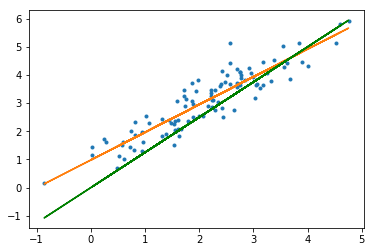

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_noisy.reshape(-1, 1), y_noisy.reshape(-1, 1))
y_predict = reg.predict(x_noisy.reshape(-1, 1))

plt.plot(x_noisy, y_noisy, '.')
plt.plot(x_noisy, y_predict, '-')
plt.plot(x_noisy, x_noisy*1.25, 'g-')
plt.show()

Let's also detemine the SSR of the orange line. 

In [7]:
orange_ssr = sum((y_predict.reshape(100) - y_noisy)**2)
print(orange_ssr)

21.9051242357


Definately much better than our green line! Let's retieve our intercept and coefficient generated from sklearn and see of with these values and having our knowledge of the linear formula at hand, can we rebuild the predicted values of the orange line from scratch using our original x values? Let's limit out retrieval to just the first 5 values of each.

In [8]:
intercept = reg.intercept_
coef = reg.coef_

print(intercept)
print(coef)

[ 0.97957306]
[[ 0.98505499]]


In [9]:
y_scratch = (x_noisy*coef) + intercept
print(y_scratch[0, 0:5])
print(y_predict[0:5])

[ 2.89849539  2.84014881  3.97591016  1.71172573  3.68393088]
[[ 2.89849539]
 [ 2.84014881]
 [ 3.97591016]
 [ 1.71172573]
 [ 3.68393088]]


Using a metric known as R^2 can tell us how much of our model can explain the variance in the data. The value will be between 0 and 1. .32 means our model can explain 32% of the variance found in the data. Below is the formula.

\begin{align}
\ R^2 = 1- \frac {\sum(y_n - \hat y_n)^2} {\sum(y_n -  y_{mean})^2}  \\
\end{align}

In [10]:
reg.score(x_noisy.reshape(-1, 1), y_noisy.reshape(-1, 1))

0.83429901826683528

For a linear relationship to exist, we must maintain a set of assumptions of our data.

1.There should be a linear and additive relationship between DV and IV. A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

2.There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

3.The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

5.The error terms must be normally distributed.

Let's check for heteroskedasticity and non-linearity; things we do not want, through the use of a Residual plot. This type of plot will graph our predicted values against our residuals. 

Heteroskedasticity means that as we move along our IV, the variance in the residuals will form a pattern. This will appear as a funnel on most plots. Non-linearity signifies a non-linear relationship and appear in our plot as a curved relationship.

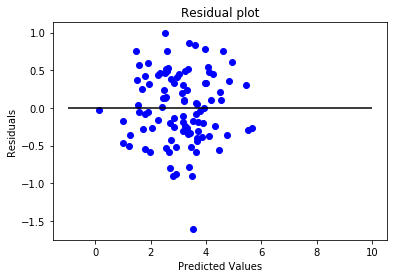

In [11]:
residual_plot = plt.scatter(y_predict, (y_predict - y_noisy.reshape(100, 1)), c='b')

plt.hlines(y=0, xmin= -1, xmax=10)
plt.title('Residual plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

No funnel! No curve! Let's move along.

# Polynomial Regressions

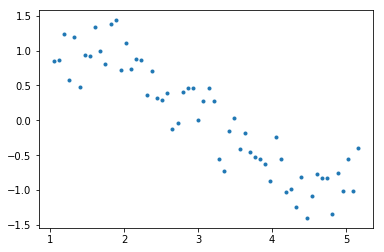

In [12]:
np.random.seed(21)
x_poly = np.array([i*np.pi/180 for i in range(60,300,4)])
x_poly = np.sort(x_poly)
y_poly = np.sin(x_poly) + np.random.normal(0,.3,len(x_poly))
plt.plot(x_poly, y_poly, '.')
plt.show()

Our data here does not display a linear relationship. If we were to construct a linear model and measure the SSR and R^2, we can be sure the results won't be pretty. 

A polynomial regression is shown below.

\begin{align}
\ y = c + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 ...\beta_n x^n
\end{align}

It is a linear regression hows maximum power is greater than one. If you can recall quadratic equations from algebra, it becomes obviouse that powers allow us to represent relationships using curves. We'll start our journey with a simple linear model, and proceed with sequential polynomial regressions utilizing increasing powers. Let's begin by creating the data of increasing powers.

In [13]:
data = pd.DataFrame(np.column_stack([x_poly, y_poly]), columns=['x','y'])

for power in range (2, 16):
    colname = 'x_{}'.format(power)
    data[colname] = data['x']**power
    
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.850436,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.865435,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.239723,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.574035,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.193912,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


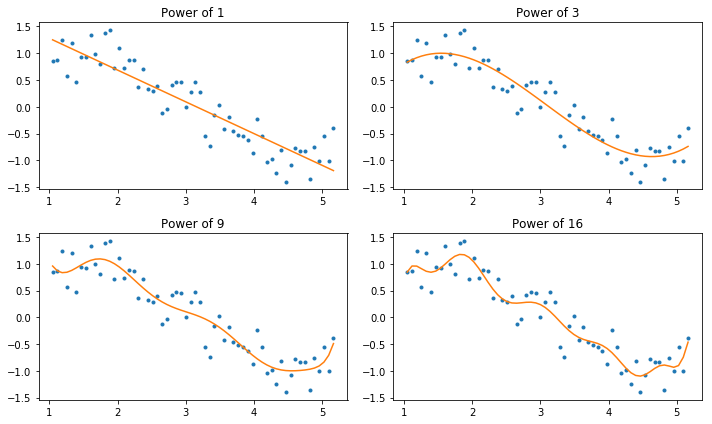

In [14]:
######Plot 1
reg_1 = LinearRegression()
reg_1.fit(x_poly.reshape(-1, 1), y_poly.reshape(-1, 1))
y_predict_1 = reg_1.predict(x_poly.reshape(-1, 1))

fig = plt.figure(figsize=(10, 6))
sub1 = fig.add_subplot(221)
sub1.set_title('Power of 1')
sub1.plot(x_poly, y_poly, '.')
sub1.plot(x_poly, y_predict_1, '-')

######Plot 2
predictors = ['x', 'x_2', 'x_3']

reg_2 = LinearRegression()
reg_2.fit(data[predictors], y_poly.reshape(-1, 1))
y_predict_2 = reg_2.predict(data[predictors])

sub2 = fig.add_subplot(222)
sub2.set_title('Power of 3')
sub2.plot(x_poly, y_poly, '.')
sub2.plot(data['x'], y_predict_2, '-')

######Plot 3
predictors = ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_8', 'x_9']

reg_3 = LinearRegression()
reg_3.fit(data[predictors], y_poly.reshape(-1, 1))
y_predict_3 = reg_3.predict(data[predictors])

sub3 = fig.add_subplot(223)
sub3.set_title('Power of 9')
sub3.plot(x_poly, y_poly, '.')
sub3.plot(data['x'], y_predict_3, '-')

######Plot 4
predictors = ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15']

reg_4 = LinearRegression()
reg_4.fit(data[predictors], y_poly.reshape(-1, 1))
y_predict_4 = reg_4.predict(data[predictors])

sub4 = fig.add_subplot(224)
sub4.set_title('Power of 16')
sub4.plot(x_poly, y_poly, '.')
sub4.plot(data['x'], y_predict_4, '-')

plt.tight_layout()
plt.show()

Every time we fit our LinearRegression object, we fit on 'x' through the powers we desire. As we can see, the model captures the nuances of the data better and better. We can verify this by measuring the SSR and R^2 for each model. 

In [15]:
ssr_1 = sum((y_predict_1.reshape(-1) - y_poly)**2)
print(ssr_1)

ssr_2 = sum((y_predict_2.reshape(-1) - y_poly)**2)
print(ssr_2)

ssr_3 = sum((y_predict_3.reshape(-1) - y_poly)**2)
print(ssr_3)

ssr_4 = sum((y_predict_4.reshape(-1) - y_poly)**2)
print(ssr_4)

6.57136694534
4.59129217862
4.05855531075
3.61191861745


# Regularization

Definately improving! So higher power means higher accuracy! However, if we were to introduce this model to unseen data, it would perform poorly. Essentially, the model has learn the given data so well, it won't be able to generalize enough to data in the wild. What is contributing to the models ability to capture so much information about the data? 

When we create a linear model, the coefficiants are estimated to obtain the lowest possible SSR value. Coefficiants behave as weights that emphasize (or not) a particular IV. Models that capture greater details of the data will have larger values for their coefficiants. This added complexity leads to the models inability to predict on unseen data, the model is overfit. Let's first validate this line of thinking by examining the coefficiants of our IV.

In [16]:
all_coef = [reg_1.coef_.reshape(-1), reg_2.coef_.reshape(-1), reg_3.coef_.reshape(-1), reg_4.coef_.reshape(-1)]
df = pd.DataFrame(all_coef)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.593113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.813083,-1.213647,0.130907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46.807010,-165.696494,230.735234,-171.903734,75.894408,-20.504995,3.331872,-0.149605,-0.149605,0.011417,NaN,NaN,NaN,NaN,NaN,NaN
3,-450.901352,835.563858,-249.941303,-809.483332,676.202802,549.983933,-1321.048426,554.806578,554.806578,-552.971529,182.145022,-40.886595,6.215039,-0.613827,0.035611,-0.000922


As we can see, the coefficients are generally becoming larger as we add more terms with increasing power into the fit method of the linear regression object. This causes overfitting. There are several techniques that aid in the overcoming of this problem. The techniques involes adding what is called a penalty term to the equation, which reduces the magnitude of the coefficients. 

Let's continue by examining the coefficients graphically.

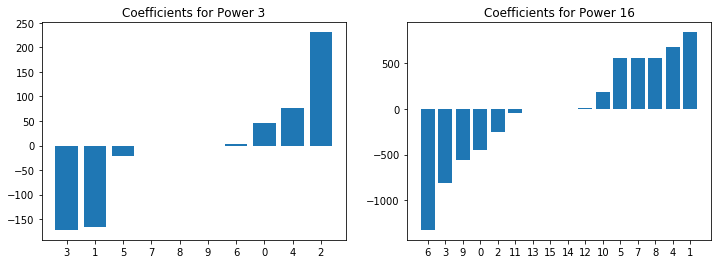

In [17]:
all_coef_plot_3 = pd.Series(reg_3.coef_.reshape(-1)).sort_values()
all_coef_plot_16 = pd.Series(reg_4.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.bar(range(len(all_coef_plot_3)), all_coef_plot_3.values, 0.8)
ax1.set(title='Coefficients for Power 3')
ax1.set_xticks(range(10))
ax1.set_xticklabels(all_coef_plot_3.index.values)

ax2.bar(range(len(all_coef_plot_16)), all_coef_plot_16.values, 0.8)
ax2.set(title='Coefficients for Power 16')
ax2.set_xticks(range(16))
ax2.set_xticklabels(all_coef_plot_16.index.values)

plt.show()

## Ridge Regression

As we can see, for this particular model, the coefficents are extremely large, resulting in a further complex model. Let's dive into the techniques designed to combat this.

Ridge Regression, is similiar to linear regression but with the addtion of a penalty term to the cost function. The penalty term is the sum of the square weights multiplied alpha(represented as lambda); a value that we manually set. Below is the formula.

\begin{align}
\ Ridge Cost Function = \sum_{i=1}^{n} (\hat y_n - y_n)^2 + \lambda \sum_{j=0}^{m} w_j^2\\
\end{align}

Below is a more expanded form.

\begin{align}
\ Ridge Cost Function = \sum_{i=1}^{n} (\sum_{j=0}^{m} w_j x_{ij} - y_n)^2 + \lambda \sum_{j=0}^{m} w_j^2\\
\end{align}

Let's evaluate our coefficients when implementing a Ridge Regression. 

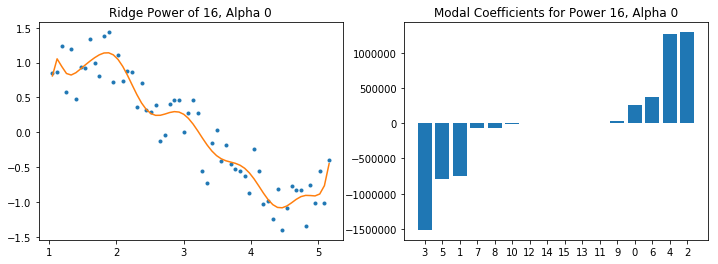

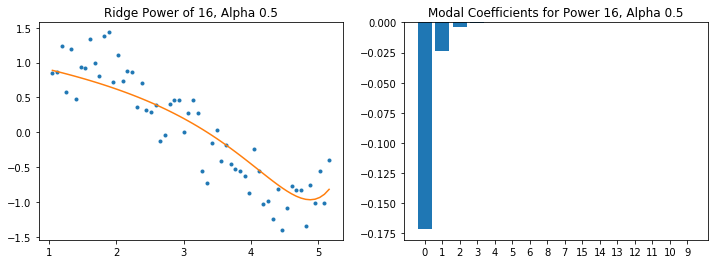

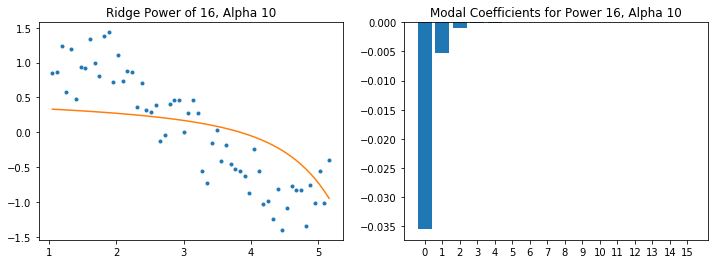

In [18]:
from sklearn.linear_model import Ridge
predictors = ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15']

#Ridge with Alpha 0
ridge_reg_0 = Ridge(alpha = 0, normalize=True)
ridge_reg_0.fit(data[predictors], y_poly.reshape(-1, 1))
ridge_predict_0 = ridge_reg_0.predict(data[predictors])
ridge_coef_plot_0 = pd.Series(ridge_reg_0.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.plot(x_poly, y_poly, '.')
ax1.plot(data['x'], ridge_predict_0, '-')
ax1.set(title='Ridge Power of 16, Alpha 0')

ax2.bar(range(len(ridge_coef_plot_0)), ridge_coef_plot_0.values, 0.8)
ax2.set(title='Modal Coefficients for Power 16, Alpha 0')
ax2.set_xticks(range(16))
ax2.set_xticklabels(ridge_coef_plot_0.index.values)

#Ridge with Alpha 0.5
ridge_reg = Ridge(alpha = 0.5, normalize=True)
ridge_reg.fit(data[predictors], y_poly.reshape(-1, 1))
ridge_predict = ridge_reg.predict(data[predictors])
ridge_coef_plot = pd.Series(ridge_reg.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.plot(x_poly, y_poly, '.')
ax1.plot(data['x'], ridge_predict, '-')
ax1.set(title='Ridge Power of 16, Alpha 0.5')

ax2.bar(range(len(ridge_coef_plot)), ridge_coef_plot.values, 0.8)
ax2.set(title='Modal Coefficients for Power 16, Alpha 0.5')
ax2.set_xticks(range(16))
ax2.set_xticklabels(ridge_coef_plot.index.values)

#Ridge with Alpha 10
ridge_reg_2 = Ridge(alpha = 10, normalize=True)
ridge_reg_2.fit(data[predictors], y_poly.reshape(-1, 1))
ridge_predict_2 = ridge_reg_2.predict(data[predictors])
ridge_coef_plot_2 = pd.Series(ridge_reg_2.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.plot(x_poly, y_poly, '.')
ax1.plot(data['x'], ridge_predict_2, '-')
ax1.set(title='Ridge Power of 16, Alpha 10')

ax2.bar(range(len(ridge_coef_plot_2)), ridge_coef_plot_2.values, 0.8)
ax2.set(title='Modal Coefficients for Power 16, Alpha 10')
ax2.set_xticks(range(16))
ax2.set_xticklabels(ridge_coef_plot_2.index.values)

plt.show()

## Lasso Regression

As you can see, adjusting for Alpha better generalizes our model and reduces comlexity! More Alpha means more regularization. It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

With ridge, the resulting values of the features never reach absolute zero. Because of this, all features will continue to be used. However we can further reduce compexity without impacting predicting power but using another technique called Lasso Regression. Lasso incorporate a penalty term just like ridge, however instead of using the sum of the square weights, lasso utilizes the sum of the absolute values of the coefficients. This results in coefficients being able to reach absolute zero. This is called Automatic Feature Selection as the model only incorporate the feature with significant coefficients. Below is the formula.

\begin{align}
\ Lasso Cost Function = \sum_{i=1}^{n} (\hat y_n - y_n)^2 + \lambda \sum_{j=0}^{m} |w_j|\\
\end{align}

/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


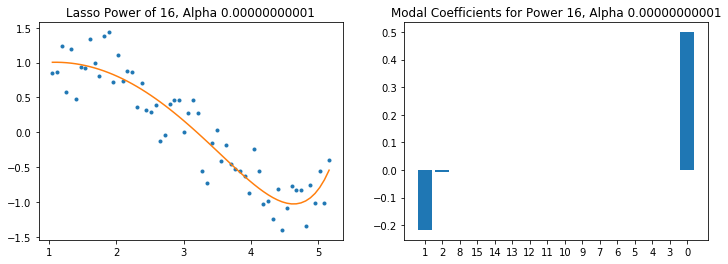

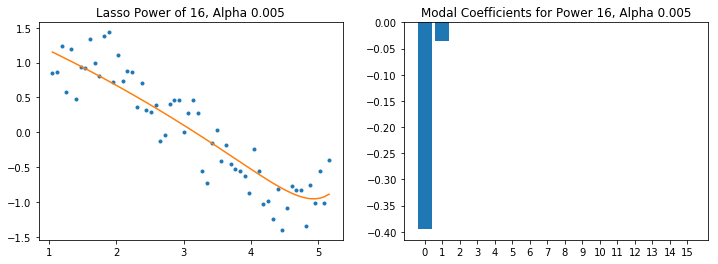

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.00000000001, normalize=True)

predictors = ['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15']

lasso_reg.fit(data[predictors], y_poly.reshape(-1, 1))
lasso_predict = lasso_reg.predict(data[predictors])
lasso_coef_plot = pd.Series(lasso_reg.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.plot(x_poly, y_poly, '.')
ax1.plot(data['x'], lasso_predict, '-')
ax1.set(title='Lasso Power of 16, Alpha 0.00000000001')

ax2.bar(range(len(lasso_coef_plot)), lasso_coef_plot.values, 0.8)
ax2.set(title='Modal Coefficients for Power 16, Alpha 0.00000000001')
ax2.set_xticks(range(16))
ax2.set_xticklabels(lasso_coef_plot.index.values)

###
lasso_reg_2 = Lasso(alpha = 0.005, normalize=True)

lasso_reg_2.fit(data[predictors], y_poly.reshape(-1, 1))
lasso_predict_2 = lasso_reg_2.predict(data[predictors])
lasso_coef_plot_2 = pd.Series(lasso_reg_2.coef_.reshape(-1)).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,4))

ax1.plot(x_poly, y_poly, '.')
ax1.plot(data['x'], lasso_predict_2, '-')
ax1.set(title='Lasso Power of 16, Alpha 0.005')

ax2.bar(range(len(ridge_coef_plot_2)), lasso_coef_plot_2.values, 0.8)
ax2.set(title='Modal Coefficients for Power 16, Alpha 0.005')
ax2.set_xticks(range(16))
ax2.set_xticklabels(lasso_coef_plot_2.index.values)
plt.show()

## Elastic Net Regression